In [1]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import API 
from tweepy import Cursor

In [2]:
consumer_key='qcCU8SXNbYan2cAZ4apDqXP5r'
consumer_secret='kzUFaP9UHeK7yBofQZ1veZZP2Tf0fLX05UBWircs9wizJv95Jg'
access_token='1090283141414043649-O6xtwiJfCfKYWGLRXxMw9FolevIiN3'
access_secret='9WE1BYqyTvCqMkBb8WdpjtN4to4hWc4UL83wOg3ug3Hod'

In [3]:
class TwitterClient():
    def __init__(self, twitter_user=None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)

        self.twitter_user = twitter_user
        
    def get_twitter_client_api(self):
        return self.twitter_client

    def get_user_timeline_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets

    def get_friend_list(self, num_friends):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends, id=self.twitter_user).items(num_friends):
            friend_list.append(friend)
        return friend_list

    def get_home_timeline_tweets(self, num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id=self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets

In [4]:
# # # # TWITTER AUTHENTICATER # # # #
class TwitterAuthenticator():

    def authenticate_twitter_app(self):
        auth = OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_token,access_secret)
        return auth

In [5]:
class TwitterStreamer():
    """
    Class for streaming and processing live tweets.
    """
    def __init__(self):
        self.twitter_autenticator = TwitterAuthenticator() 

    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        # This handles Twitter authetification and the connection to Twitter Streaming API
        listener = TwitterListener(fetched_tweets_filename)
        auth = self.twitter_autenticator.authenticate_twitter_app() 
        stream = Stream(auth, listener)

        # This line filter Twitter Streams to capture data by the keywords: 
        stream.filter(track=hash_tag_list)

In [6]:
# # # # TWITTER STREAM LISTENER # # # #
class TwitterListener(StreamListener):
    """
    This is a basic listener that just prints received tweets to stdout.
    """
    def __init__(self, fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename

    def on_data(self, data):
        try:
            print(data)
            with open(self.fetched_tweets_filename, 'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True
          
    def on_error(self, status):
        if status == 420:
            # Returning False on_data method in case rate limit occurs.
            return False
        print(status)

In [7]:
if __name__ == '__main__':
 
    # Authenticate using config.py and connect to Twitter Streaming API.
    hash_tag_list = ["donal trump", "hillary clinton", "barack obama", "bernie sanders"]
    fetched_tweets_filename = "tweets.txt"

    twitter_client = TwitterClient('pycon')
    print(twitter_client.get_user_timeline_tweets(1))


[Status(_api=<tweepy.api.API object at 0x00000118BCDAA5F8>, _json={'created_at': 'Tue Jan 29 18:15:03 +0000 2019', 'id': 1090312383640334338, 'id_str': '1090312383640334338', 'text': 'Thank you @ROKAutomation for joining #pycon2019 as a Platinum sponsor! Rockwell Automation uses Python pkgs like as… https://t.co/CNp1pYiqK4', 'truncated': True, 'entities': {'hashtags': [{'text': 'pycon2019', 'indices': [37, 47]}], 'symbols': [], 'user_mentions': [{'screen_name': 'ROKAutomation', 'name': 'Rockwell Automation', 'id': 44627268, 'id_str': '44627268', 'indices': [10, 24]}], 'urls': [{'url': 'https://t.co/CNp1pYiqK4', 'expanded_url': 'https://twitter.com/i/web/status/1090312383640334338', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://sproutsocial.com" rel="nofollow">Sprout Social</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': N

In [8]:
import numpy as np
import pandas as pd

In [9]:
class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

        df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return df


In [10]:
if __name__ == '__main__':

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()

    api = twitter_client.get_twitter_client_api()

    tweets = api.user_timeline(screen_name="realDonaldTrump", count=20)

    #print(dir(tweets[0]))
    #print(tweets[0].retweet_count)

    df = tweet_analyzer.tweets_to_data_frame(tweets)
    
    print(df.head(10))


                                              Tweets                   id  \
0  A low level staffer that I hardly knew named C...  1090244651578204160   
1  How does Da Nang Dick (Blumenthal) serve on th...  1090078588748087296   
2  In the beautiful Midwest, windchill temperatur...  1090074254010404864   
3  “In the Media’s effort to destroy the Presiden...  1089883338758914048   
4  Howard Schultz doesn’t have the “guts” to run ...  1089881244312178688   
5  Numerous states introducing Bible Literacy cla...  1089876055224184833   
6  Tariffs on the “dumping” of Steel in the Unite...  1089874871247687683   
7  After all that I have done for the Military, o...  1089691985164800001   
8  Never thought I’d say this but I think @johnro...  1089691564283183105   
9  BUILD A WALL &amp; CRIME WILL FALL! https://t....  1089589587456991233   

   len                date              source   likes  retweets  
0  139 2019-01-29 13:45:55  Twitter for iPhone   61688     12825  
1  140 2019-01-29 

In [11]:
import matplotlib.pyplot as plt


In [12]:
if __name__ == '__main__':

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()

    api = twitter_client.get_twitter_client_api()

    tweets = api.user_timeline(screen_name="realDonaldTrump", count=20)

    #print(dir(tweets[0]))
    #print(tweets[0].retweet_count)

    df = tweet_analyzer.tweets_to_data_frame(tweets)

    # Get average length over all tweets:
    print(np.mean(df['len']))

    # Get the number of likes for the most liked tweet:
    print(np.max(df['likes']))

    # Get the number of retweets for the most retweeted tweet:
    print(np.max(df['retweets']))

124.5
218132
46785


In [13]:
print(df.head(10))

                                              Tweets                   id  \
0  A low level staffer that I hardly knew named C...  1090244651578204160   
1  How does Da Nang Dick (Blumenthal) serve on th...  1090078588748087296   
2  In the beautiful Midwest, windchill temperatur...  1090074254010404864   
3  “In the Media’s effort to destroy the Presiden...  1089883338758914048   
4  Howard Schultz doesn’t have the “guts” to run ...  1089881244312178688   
5  Numerous states introducing Bible Literacy cla...  1089876055224184833   
6  Tariffs on the “dumping” of Steel in the Unite...  1089874871247687683   
7  After all that I have done for the Military, o...  1089691985164800001   
8  Never thought I’d say this but I think @johnro...  1089691564283183105   
9  BUILD A WALL &amp; CRIME WILL FALL! https://t....  1089589587456991233   

   len                date              source   likes  retweets  
0  139 2019-01-29 13:45:55  Twitter for iPhone   61703     12830  
1  140 2019-01-29 

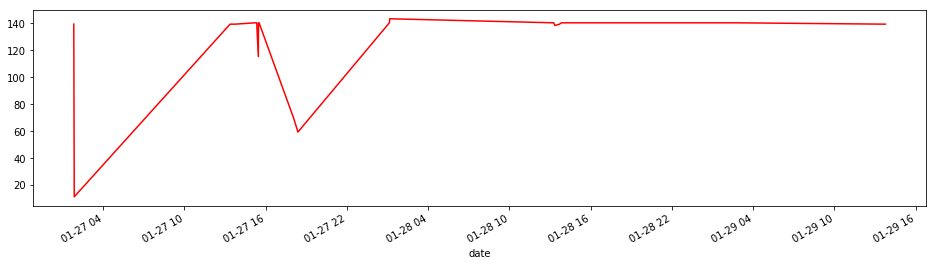

In [14]:
time_likes = pd.Series(data=df['len'].values, index=df['date'])
time_likes.plot(figsize=(16, 4), color='r')
plt.show()

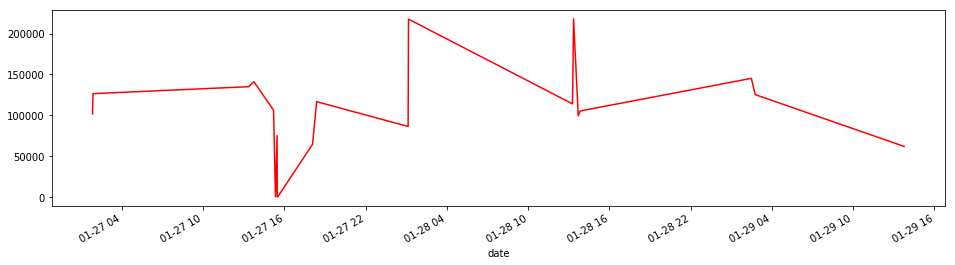

In [15]:
time_favs = pd.Series(data=df['likes'].values, index=df['date'])
time_favs.plot(figsize=(16, 4), color='r')
plt.show()

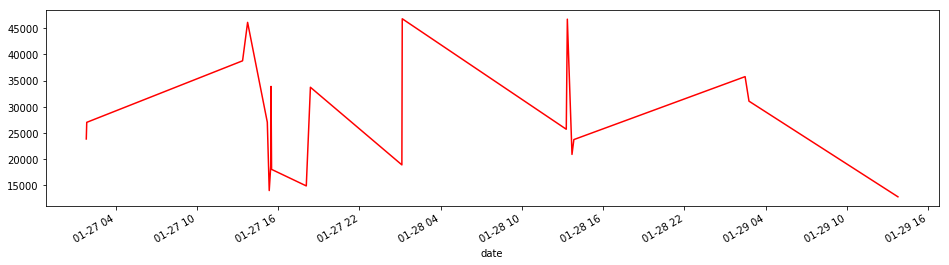

In [16]:
time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
time_retweets.plot(figsize=(16, 4), color='r')
plt.show()

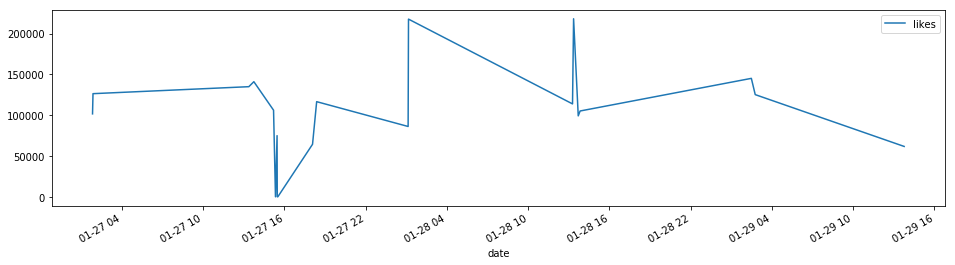

In [17]:
# Layered Time Series:
time_likes = pd.Series(data=df['likes'].values, index=df['date'])
time_likes.plot(figsize=(16, 4), label="likes", legend=True)

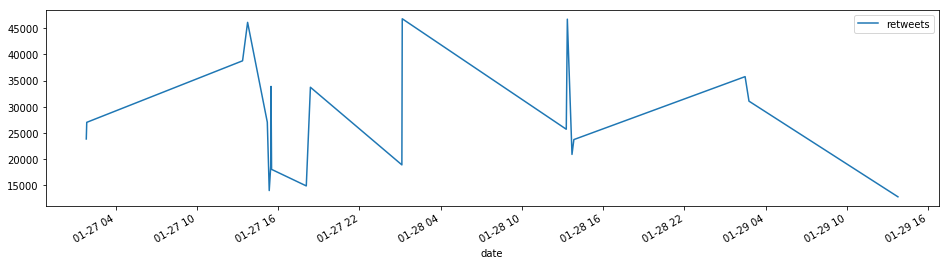

In [18]:
time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
time_retweets.plot(figsize=(16, 4), label="retweets", legend=True)
plt.show()

In [19]:
from textblob import TextBlob
import re

In [20]:
class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """

    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

    def analyze_sentiment(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))
        
        if analysis.sentiment.polarity > 0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1

    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])

        df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return df

In [21]:
if __name__ == '__main__':

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()

    api = twitter_client.get_twitter_client_api()

    tweets = api.user_timeline(screen_name="realDonaldTrump", count=200)

    df = tweet_analyzer.tweets_to_data_frame(tweets)
    df['sentiment'] = np.array([tweet_analyzer.analyze_sentiment(tweet) for tweet in df['tweets']])

    print(df.head(10))


                                              tweets                   id  \
0  A low level staffer that I hardly knew named C...  1090244651578204160   
1  How does Da Nang Dick (Blumenthal) serve on th...  1090078588748087296   
2  In the beautiful Midwest, windchill temperatur...  1090074254010404864   
3  “In the Media’s effort to destroy the Presiden...  1089883338758914048   
4  Howard Schultz doesn’t have the “guts” to run ...  1089881244312178688   
5  Numerous states introducing Bible Literacy cla...  1089876055224184833   
6  Tariffs on the “dumping” of Steel in the Unite...  1089874871247687683   
7  After all that I have done for the Military, o...  1089691985164800001   
8  Never thought I’d say this but I think @johnro...  1089691564283183105   
9  BUILD A WALL &amp; CRIME WILL FALL! https://t....  1089589587456991233   

   len                date              source   likes  retweets  sentiment  
0  139 2019-01-29 13:45:55  Twitter for iPhone   61845     12856         -